In [51]:
import pandas as pd
import numpy as np

In [52]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
print('The train data has {} rows and {} columns'.format(train.shape[0], train.shape[1]))
print('The test data has {} rows and {} columns'.format(test.shape[0], test.shape[1]))

The train data has 9366 rows and 18 columns
The test data has 4801 rows and 17 columns


In [180]:
print(train.head(n=5))

  portfolio_id      desk_id    office_id pf_category  start_date       sold  \
0   PF00001002  DSK00001001  OFF00001002           B    20040720  110000000   
1   PF00001003  DSK00001002  OFF00001001           A    20040709  176671000   
2   PF00001005  DSK00001004  OFF00001001           A    20040723   56474000   
3   PF00001006  DSK00001005  OFF00001001           A    20040609  164813000   
4   PF00001007  DSK00001005  OFF00001002           B    20040609  140800000   

  country_code  euribor_rate currency  libor_rate        bought  \
0            T       0.02074      USD    2.332216  1.098097e+08   
1            N       0.02074      GBP    5.269617  1.760084e+08   
2            T       0.02074      USD    2.332216  5.637953e+07   
3            T       0.02074      USD    2.332216  1.645088e+08   
4            T       0.02074      USD    2.332216  1.405402e+08   

   creation_date indicator_code  sell_date type hedge_value status   return  
0       20040720            NaN   20040812  

In [53]:
target = train['return']
train=train.drop('return',axis=1)


In [54]:
train=train.drop('portfolio_id',axis=1)
test=test.drop('portfolio_id',axis=1)

In [55]:
df_all = pd.concat([train, test])


In [211]:
df_all.isnull().sum()


desk_id           5613
office_id            0
pf_category          0
start_date           0
sold                 2
country_code         0
euribor_rate         0
currency             0
libor_rate         739
bought               2
creation_date        0
indicator_code    8550
sell_date            0
type                 0
hedge_value       8552
status            4541
dtype: int64

In [139]:
print(df_all.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14167 entries, 0 to 4800
Data columns (total 16 columns):
desk_id           8554 non-null object
office_id         14167 non-null object
pf_category       14167 non-null object
start_date        14167 non-null int64
sold              14165 non-null float64
country_code      14167 non-null object
euribor_rate      14167 non-null float64
currency          14167 non-null object
libor_rate        13428 non-null float64
bought            14165 non-null float64
creation_date     14167 non-null int64
indicator_code    5617 non-null object
sell_date         14167 non-null int64
type              14167 non-null object
hedge_value       5615 non-null object
status            9626 non-null object
dtypes: float64(4), int64(3), object(9)
memory usage: 1.8+ MB
None


In [56]:
df_all['libor_rate'].fillna(df_all['libor_rate'].median(), inplace=True)

In [57]:
df_all.isnull().sum()

desk_id           5613
office_id            0
pf_category          0
start_date           0
sold                 2
country_code         0
euribor_rate         0
currency             0
libor_rate           0
bought               2
creation_date        0
indicator_code    8550
sell_date            0
type                 0
hedge_value       8552
status            4541
dtype: int64

In [58]:
df_all['sold'].fillna(df_all['sold'].median(), inplace=True)
df_all['bought'].fillna(df_all['bought'].median(), inplace=True)

In [54]:
#from sklearn.preprocessing import Imputer
#imp = Imputer(missing_values='NaN', strategy='most_frequent', axis=0)
#df_all=imp.fit_transform(df_all) 

import pandas as pd
import numpy as np

from sklearn.base import TransformerMixin

class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value 
        in column.

        Columns of other types are imputed with mean of column.

        """
    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].median() for c in X],
            index=X.columns)

        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)


#X = pd.DataFrame(data)
xt = DataFrameImputer().fit_transform(df_all)

In [59]:
#df_all['status'] = df_all['status'].fillna(df_all['status'].value_counts().index[0])c
#df_all['hedge_value'] = df_all['status'].fillna(df_all['status'].value_counts().index[0])
df_all = df_all.apply(lambda x:x.fillna(x.value_counts().index[0]))
#df_all['hedge_value'].fillna(False, inplace=True)
df_all['status'].fillna(False, inplace=True)
#test['hedge_value'].fillna(False, inplace=True)
#df_all['bought'].fillna(df_all['bought'].median(), inplace=True)

In [9]:
df_all.isnull().sum()

desk_id           0
office_id         0
pf_category       0
start_date        0
sold              0
country_code      0
euribor_rate      0
currency          0
libor_rate        0
bought            0
creation_date     0
indicator_code    0
sell_date         0
type              0
hedge_value       0
status            0
dtype: int64

In [60]:
#df_all=df_all.drop('desk_id',axis=1)
df_all=df_all.drop('indicator_code',axis=1)
df_all=df_all.drop('hedge_value',axis=1)
df_all=df_all.drop('status',axis=1)

In [61]:
cf=df_all.select_dtypes(include=['object']).columns

In [62]:
print (cf)

Index(['desk_id', 'office_id', 'pf_category', 'country_code', 'currency',
       'type'],
      dtype='object')


In [63]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for i in cf:
    df_all[i]=le.fit_transform(df_all[i])



In [365]:

#df_all['desk_id']=le.fit_transform(df_all['desk_id'])
#df_all['indicator_code']=le.fit_transform(df_all['indicator_code'])
#df_all['status']=le.fit_transform(df_all['status'])
#print(le.classes_)


In [64]:
#from sklearn.preprocessing import MinMaxScaler
##scaler = MinMaxScaler()
#df_all=scaler.fit_transform(df_all)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_all=scaler.fit_transform(df_all)

In [18]:
df_all=pd.DataFrame(df_all)
print(df_all.head(n=5))

         0         1         2         3         4         5         6   \
0 -2.705573  0.672186 -0.437003 -2.532929  0.044765  0.919245  0.883079   
1 -2.704858 -1.487683 -1.514454 -2.533292  0.424661  0.066512  0.883079   
2 -2.703429 -1.487683 -1.514454 -2.532830 -0.260230  0.919245  0.883079   
3 -2.702715 -1.487683 -1.514454 -2.536589  0.357094  0.919245  0.883079   
4 -2.702715  0.672186 -0.437003 -2.536589  0.220266  0.919245  0.883079   

         7         8         9         10  11        12        13        14  \
0  1.403640  0.985558  0.044158 -2.533295   0 -2.542583 -0.958504 -0.393318   
1  0.300368  3.083167  0.421505 -2.533196   0 -2.542583 -0.391170 -0.393318   
2  1.403640  0.985558 -0.260404 -2.533196   0 -2.542418 -1.525837 -0.393318   
3  1.403640  0.985558  0.355955 -2.533196   0 -2.545836 -1.525837 -0.393318   
4  1.403640  0.985558  0.219328 -2.533196   0 -2.545836 -0.958504 -0.393318   

   15  
0   0  
1   0  
2   0  
3   0  
4   0  


In [65]:
num_train=len(train)
X_train = df_all[:num_train]
X_test = df_all[num_train:]


In [66]:
from sklearn.cross_validation import train_test_split
X_tr1,X_te1,y_tr1,y_te1=train_test_split(X_train,target,test_size=0.1,random_state=5)

In [35]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
def multAcc(pred, dtrain):
    label = dtrain.get_label()
    acc = r2_score(label, pred)
    return 'maccuracy', acc

import xgboost as xgb
params = {
    'n_trees': 1500, 
    'eta': 0.03,
    'max_depth':45,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'min_child_weight' :7,
    'lambda':9,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 1
}
#dtrain = xgb.DMatrix(data=X_tr1, label=y_tr1)
dvalid = xgb.DMatrix(data=X_te1, label=y_te1)
#dtr = xgb.DMatrix(X_tr1, y_tr1)
#dte = xgb.DMatrix(X_te1)
#watchlist = [(dtr, 'train'),(dte, 'eval')]

dtrain = xgb.DMatrix(data=X_train, label=target)
#dvalid = xgb.DMatrix(data=X_train, label=target)
#dtrain = xgb.DMatrix(data=X_tr1, label=y_tr1)
#dvalid = xgb.DMatrix(data=X_te1, label=y_te1)
dtest = xgb.DMatrix(data=X_test)
watchlist = [(dtrain, 'train'),(dvalid, 'eval')]




num_boost_rounds = 1200
#model = xgb.train(xgb_params, dtrain, num_boost_round=num_boost_rounds,verbose_eval=20)
#model=xgb.train(params, dtrain, 1700, watchlist,maximize=True, verbose_eval=20,feval=multAcc)

model=xgb.train(params, dtrain, 340, watchlist, maximize=True, verbose_eval=20, feval=multAcc)


xgb_pred = model.predict(dtrain)
xgb_pred1 = model.predict(dvalid)
r2=r2_score(target,xgb_pred)
#r2=r2_score(y_tr1,xgb_pred)
r2_1=r2_score(y_te1,xgb_pred1)
#mse1=mean_squared_error(y_te1,pred1)

print("r2 score train and evaluation is {},{}".format(r2,r2_1))

[0]	train-maccuracy:-526.161	eval-maccuracy:-585.8
[20]	train-maccuracy:-155.764	eval-maccuracy:-173.446
[40]	train-maccuracy:-45.7565	eval-maccuracy:-50.9016
[60]	train-maccuracy:-13.0763	eval-maccuracy:-14.4874
[80]	train-maccuracy:-3.34637	eval-maccuracy:-3.65771
[100]	train-maccuracy:-0.443285	eval-maccuracy:-0.435279
[120]	train-maccuracy:0.434707	eval-maccuracy:0.533375
[140]	train-maccuracy:0.70944	eval-maccuracy:0.828735
[160]	train-maccuracy:0.801173	eval-maccuracy:0.920653
[180]	train-maccuracy:0.834542	eval-maccuracy:0.952082
[200]	train-maccuracy:0.850973	eval-maccuracy:0.96325
[220]	train-maccuracy:0.860071	eval-maccuracy:0.968077
[240]	train-maccuracy:0.865654	eval-maccuracy:0.970897
[260]	train-maccuracy:0.869422	eval-maccuracy:0.97293
[280]	train-maccuracy:0.875614	eval-maccuracy:0.974219
[300]	train-maccuracy:0.879582	eval-maccuracy:0.975771
[320]	train-maccuracy:0.884026	eval-maccuracy:0.976667
r2 score train and evaluation is 0.8887475748368505,0.9777654971764626


train-maccuracy:0.945442	eval-maccuracy:0.810505
train-maccuracy:0.92745	eval-maccuracy:0.815367
train-maccuracy:0.929279	eval-maccuracy:0.815984  #15,0.01
train-maccuracy:0.917333	eval-maccuracy:0.856178 #15,0.01,child_weight:2
train-maccuracy:0.900859	eval-maccuracy:0.875528  #15,0.01,child_weight:3
train-maccuracy:0.885925	eval-maccuracy:0.888673  #15,0.01,child_weight:4
train-maccuracy:0.972998	eval-maccuracy:0.961316
train-maccuracy:0.992797	eval-maccuracy:0.955204
r2 score train and evaluation is 0.9229597807749278,0.9460040433767868 with removing all
r2 score train and evaluation is 0.9892839631659844,0.9430579961462168





In [37]:
xgb_pred = model.predict(dtest)

In [67]:
xgb_pred=pd.read_csv('xgb_pred.csv')

In [40]:
print(xgb_pred.head(n=5))

      portfolio_id    return
0       PF00001001  0.024934
1       PF00001004  0.025117
2       PF00001009  0.024552
3       PF00001013  0.025226
4       PF00001014  0.024862


In [381]:
X_train=pd.DataFrame(X_train)

In [67]:
import lightgbm as lgb
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=188,
                              learning_rate=0.3, n_estimators=9720,
                              max_bin = 55, bagging_fraction = 1,max_depth=90,                    
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, num_iterations=2500,min_sum_hessian_in_leaf = 11)
model_lgb.fit(X_tr1,y_tr1)
lgb_pred = model_lgb.predict(X_tr1)
lgb_pred1 = model_lgb.predict(X_te1)

r2=r2_score(y_tr1,lgb_pred)

r2_1=r2_score(y_te1,lgb_pred1)

print("r2 score train and evaluation of light gbm is {},{}".format(r2,r2_1))

/usr/local/lib/python3.5/dist-packages/lightgbm/engine.py:99: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.5/dist-packages/lightgbm/basic.py:642: UserWarning: max_bin keyword has been found in `params` and will be ignored. Please use max_bin argument of the Dataset constructor to pass this parameter.
  'Please use {0} argument of the Dataset constructor to pass this parameter.'.format(key))
/usr/local/lib/python3.5/dist-packages/lightgbm/basic.py:648: LGBMDeprecationWarning: The `max_bin` parameter is deprecated and will be removed in 2.0.12 version. Please use `params` to pass this parameter.
  'Please use `params` to pass this parameter.', LGBMDeprecationWarning)


r2 score train and evaluation of light gbm is 0.9068864266576513,0.9467903954905736


In [75]:
#xgb_pred = model.predict(dtest)
lgb_predi=model_lgb.predict(X_test)

In [72]:
#ensemble_train = xgb_pred*0.7 + lgb_pred*0.3#+stack_pred*0.6
#ensemble_valuation = xgb_pred1*0.7+ lgb_pred1*0.3#+stack_pred1*0.6
#r2=r2_score(y_tr1,ensemble_train)

#r2_1=r2_score(y_te1,ensemble_valuation)
#print("result of ensemble is {},{}".format(r2,r2_1 ))

In [72]:
pred=xgb_pred['return'] *0.13 + stack_pred*0.87

In [132]:
print(X_train.shape)
print(X_tr1.shape)
print(y_tr1.shape)
#assert(y_tr1.shape==(-1,1))
#y_tr1=y_tr1.reshape((-1,1))
#print(y_tr1.shape)

(9366, 13)
(8429, 13)
(8429, 1)


In [128]:
X=X_tr1
y=y_tr1

In [141]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_tr1)
    rmse= np.sqrt(-cross_val_score(model, X_tr1, y_tr1, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [163]:
#X_tr1=X_tr1.reshape(X_tr1.shape[0],X_tr1.shape[1]).astype('float64')
stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBoost, KRR),
                                                 meta_model = lasso)
stacked_averaged_models.fit(X_tr1, y_tr1)
stacked_train_pred = stacked_averaged_models.predict(train.values)
#score = rmsle_cv(stacked_averaged_models)
#print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [124]:
from sklearn.base import TransformerMixin
from sklearn.datasets import make_regression
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge

class RidgeTransformer(Ridge, TransformerMixin):

    def transform(self, X, *_):
        return self.predict(X)


class RandomForestTransformer(RandomForestRegressor, TransformerMixin):

    def transform(self, X, *_):
        return self.predict(X)


class KNeighborsTransformer(KNeighborsRegressor, TransformerMixin):

    def transform(self, X, *_):
        return self.predict(X)
    
def build_model():
    ridge_transformer = Pipeline(steps=[
        ('scaler', StandardScaler()),
        ('poly_feats', PolynomialFeatures()),
        ('ridge', RidgeTransformer())
    ])

    pred_union = FeatureUnion(
        transformer_list=[
            ('ridge', ridge_transformer),
            ('rand_forest', RandomForestTransformer()),
            ('knn', KNeighborsTransformer())
        ],
        n_jobs=2
    )

    model = Pipeline(steps=[
        ('pred_union', pred_union),
        ('lin_regr', LinearRegression())
    ])

    return model
print('Build and fit a model..')

model = build_model()

#X_train1,target1 = make_regression()
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(model)
#X_tr1, X_te1, y_tr1, y_te1 = train_test_split(X_train,target, test_size=0.1)
X_tr1=pd.DataFrame(X_tr1)
y_tr1=pd.DataFrame(y_tr1)
#print(X_tr1.type)
#print(y_tr1.type)
model.fit(X_tr1,y_tr1)
stack_pred = model.predict(X_tr1)
stack_pred1 = model.predict(X_te1)

r2=r2_score(y_tr1,stack_pred)

r2_1=r2_score(y_te1,stack_pred1)

print("r2 score train and evaluation of light gbm is {},{}".format(r2,r2_1))
#score = model.score(X_test, y_test)

#print('Done. Score:', score)

Build and fit a model..
Pipeline(memory=None,
     steps=[('pred_union', FeatureUnion(n_jobs=2,
       transformer_list=[('ridge', Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('poly_feats', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('ridge', RidgeTransformer(...=None)), ('lin_regr', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])


/usr/local/lib/python3.5/dist-packages/sklearn/base.py:520: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)


ValueError: all the input arrays must have same number of dimensions

In [83]:
# Initializing models
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from mlxtend.regressor import StackingRegressor
from mlxtend.data import boston_housing_data
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import HuberRegressor
#from sklearn.linear_model import 
from xgboost import XGBRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeRegressor
#from sklearn.linear_model import ARDRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import r2_score
lr = LinearRegression()
svr_lin = SVR(kernel='linear')
ridge = Ridge(random_state=1)
svr= SVR()
Elasticnet=ElasticNet()
extra_tree=ExtraTreesRegressor()
lasso=Lasso()
ada_boost=AdaBoostRegressor()
Bayesianridge=BayesianRidge()
random=RandomForestRegressor()
knn=KNeighborsRegressor()
gradient_boost=GradientBoostingRegressor()
xgb = XGBRegressor() 
huber=HuberRegressor()
sgd=SGDRegressor()
tree=DecisionTreeRegressor()
naive_bayes=GaussianNB()
BR=BaggingRegressor()
#ARD=ARDRegression()
stregr = StackingRegressor(regressors=[lasso,svr,ridge,BR,random,Elasticnet,Bayesianridge,gradient_boost,knn,ada_boost,
                                      extra_tree, huber,sgd,tree], 
                           meta_regressor= xgb)

#params = {'lasso__alpha': [ 1.0, 2.0],
         # 'ridge__alpha': [ 1.0, 2.0]
         # }

#grid = GridSearchCV(estimator=stregr, 
                   # param_grid=params, 
                    #cv=5,
                    #refit=True)
#grid.fit(X_tr1, y_tr1)

#for params, mean_score, scores in grid.grid_scores_:
        #print("%0.3f +/- %0.2f %r"
              #% (mean_score, scores.std() / 2.0, params))



#pred= grid.best_estimator_.predict(X_tr1)
#pred1=grid.best_estimator_.predict(X_te1)

#stregr = StackingRegressor(regressors=[ lasso,ridge,Elasticnet,Bayesianridge,gradient_boost,knn], 
                           #meta_regressor= random_forest)
#print(grid.best_estimator_)
# Training the stacking classifier

stregr.fit(X_train, target)
#stregr.fit(X_tr1, y_tr1)
#stack_pred=stregr.predict(X_tr1)
#stack_pred1=stregr.predict(X_te1)
# Evaluate and visualize the fit
#r2=r2_score(y_tr1,pred)
#r2=r2_score(y_tr1,stack_pred)
#r2_1=r2_score(y_te1,stack_pred1)
print('training complete')
#print("r2 score train and evaluation is {},{}".format(r2,r2_1))#

/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


training complete


r2 score train and evaluation is 0.9832486449878456,0.9721228426904391
r2 score train and evaluation is 0.9997665315042173,0.9729329262688503
r2 score train and evaluation is 0.9997705850245412,0.9723789307656796




In [382]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.0148 (0.0112)



In [383]:
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 0.0146 (0.0114)



In [384]:
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Kernel Ridge score: 0.0124 (0.0160)



In [385]:
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 0.0100 (0.0140)



In [386]:
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Xgboost score: 0.0139 (0.0129)



In [387]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   


In [388]:
averaged_models = AveragingModels(models = (ENet, GBoost, KRR, lasso))

score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 0.0123 (0.0132)



In [392]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [393]:
stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBoost, KRR),
                                                 meta_model = lasso)

score = rmsle_cv(stacked_averaged_models)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
mean square error and r2 score of xgb is 0.9066840209813242,3.588618098926056e-05
r2 score and mean square error of xgb is 0.9072522212760351,3.566767030300321e-05
0.96440

In [36]:
pred = model.predict(dtest)

In [71]:
stack_pred = stregr.predict(X_test)

In [86]:
pred=xgb_pred['return'] *0.7 + stack_pred*0.3

In [87]:
sub = pd.read_csv('sample_submission.csv')
sub['return'] = pred
#sub['return'] = sub['return'].astype(int)
sub.to_csv('Jishnu.csv', index=False)


# Second Problem

In [28]:
import pandas as pd
import numpy as np
train = pd.read_csv('train_1.csv')
test = pd.read_csv('test_1.csv')
print('The train data has {} rows and {} columns'.format(train.shape[0], train.shape[1]))
print('The test data has {} rows and {} columns'.format(test.shape[0], test.shape[1]))

The train data has 348978 rows and 51 columns
The test data has 523466 rows and 50 columns


In [102]:
print(train.head(n=5))

  transaction_id     num_var_1  num_var_2  num_var_3     num_var_4  \
0          id_11  2.302632e-08   0.040182          0  1.800000e-07   
1          id_33  7.965789e-06   0.157872          0  2.105000e-06   
2          id_51  7.828947e-08   0.089140          0  3.550000e-07   
3          id_54  7.894737e-08   0.227239          0  1.050000e-06   
4          id_62  3.321053e-06   0.160410          0  2.105000e-06   

      num_var_5     num_var_6     num_var_7 cat_var_1 cat_var_2  ...    \
0  2.302632e-08  2.368421e-08  1.115205e-08       NaN        ce  ...     
1  2.769737e-07  7.965789e-06  2.433058e-06        da        tn  ...     
2  4.671053e-08  1.052632e-07  4.276014e-07        gf        ce  ...     
3  1.381579e-07  2.190789e-07  1.848054e-08       NaN        ce  ...     
4  2.769737e-07  3.340789e-06  2.152983e-06        da        tn  ...     

  cat_var_34 cat_var_35 cat_var_36 cat_var_37 cat_var_38 cat_var_39  \
0          0          0          0          0          0       

In [29]:
target = train['target']
train=train.drop('target',axis=1)



In [30]:
train=train.drop('transaction_id',axis=1)
test=test.drop('transaction_id',axis=1)



In [4]:
df_all = pd.concat([train, test])


In [47]:
df_all=pd.read_csv('new_df_all_with_four.csv')

In [88]:
print(df_all.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 872444 entries, 0 to 523465
Data columns (total 49 columns):
num_var_1     872444 non-null float64
num_var_2     872444 non-null float64
num_var_3     872444 non-null float64
num_var_4     872444 non-null float64
num_var_5     872444 non-null float64
num_var_6     872444 non-null float64
num_var_7     872444 non-null float64
cat_var_1     837970 non-null object
cat_var_2     872444 non-null object
cat_var_3     775229 non-null object
cat_var_4     872444 non-null object
cat_var_5     872444 non-null object
cat_var_6     850501 non-null object
cat_var_7     872444 non-null object
cat_var_8     754568 non-null object
cat_var_9     872444 non-null object
cat_var_10    872444 non-null object
cat_var_11    872444 non-null object
cat_var_12    872444 non-null object
cat_var_13    872444 non-null object
cat_var_14    872444 non-null object
cat_var_15    872444 non-null object
cat_var_16    872444 non-null object
cat_var_17    872444 non-null o

In [108]:
print(len(df_all))

872444


In [ ]:
@@@0.num_var_1          0
@@@1.num_var_2          0
2.num_var_3          0
3.num_var_4          0
@@@4.num_var_5          0
@@@5.num_var_6          0
@@@@6.num_var_7          0
@@@7.cat_var_1      34474
@@@8.cat_var_2          0
@@@9.cat_var_3      97215
10.cat_var_4          0
11.cat_var_5          0
@@@12.cat_var_6      21943
13.cat_var_7          0
@@@14.cat_var_8     117876
---@@@15.cat_var_9          0
----@@@16.cat_var_10         0
@@@17.cat_var_11         0
@@@18,cat_var_12         0
@@@19.cat_var_13         0
@@@20.cat_var_14         0
@@@21.cat_var_15         0
22.cat_var_16         0
@@@23.cat_var_17         0
@@@24.cat_var_18         0
25.cat_var_19         0
26.cat_var_20         0
27.cat_var_21         0
@@@28.cat_var_22         0
29.cat_var_23         0
30.cat_var_24         0
31.cat_var_25         0
32.cat_var_26         0
33.cat_var_27         0
34.cat_var_28         0
35.cat_var_29         0
36.cat_var_30         0
37.cat_var_31         0
38.cat_var_32         0
39.cat_var_33         0
40.cat_var_34         0
41.cat_var_35         0
42.cat_var_36         0
43.cat_var_37         0
44.cat_var_38         0
45.cat_var_39         0
46.cat_var_40         0
47.cat_var_41         0
48.cat_var_42         0
dtype: int64

In [20]:
df_all_1=(df_all['num_var_7'],df_all['cat_var_3'],df_all['num_var_1'],df_all['num_var_6'],df_all['cat_var_15'],df_all['cat_var_17'],df_all['num_var_2'],df_all['cat_var_14'])
df_all['num_var_7'],
df_all['cat_var_3'],
df_all['num_var_1'],
df_all['num_var_6'],
df_all['cat_var_15'],
df_all['cat_var_17'],
df_all['num_var_2'],
df_all['cat_var_14']
cat_var_1
cat_var_8
num_var_5 

In [23]:
1. feature 6 (0.168841)
2. feature 9 (0.164323)
3. feature 0 (0.135010)
4. feature 5 (0.095527)
5. feature 21 (0.041294)
6. feature 23 (0.037992)
7. feature 1 (0.037941)
8. feature 20 (0.031304)
9. feature 7 (0.026507)
10. feature 14 (0.026296)
11. feature 4 (0.025587)
---12. feature 12 (0.025329)
---13. feature 16 (0.024375) not good
---14. feature 15 (0.021755) not good
----15. feature 22 (0.021519)not good
-----16. feature 8 (0.019772) ok
------17. feature 19 (0.017827) not good
-------18. feature 18 (0.013268)not good
--------19. feature 17 (0.013215)not good
---------20. feature 24 (0.013082)not good
21. feature 25 (0.009202) not good
22. feature 11 (0.008804) not good
23. feature 3 (0.006342)@ already there
24. feature 30 (0.002714) not good
25. feature 26 (0.002544)not good
26. feature 13 (0.002433)not good
27. feature 10 (0.002145)not good
28. feature 27 (0.001949)not good
29. feature 32 (0.001353)not good
30. feature 35 (0.000528)not good
31. feature 28 (0.000462)not good
32. feature 29 (0.000387)not good
33. feature 34 (0.000154)not good
34. feature 31 (0.000149)not good
35. feature 33 (0.000024)not good
36. feature 2 (0.000022)already there
37. feature 38 (0.000011)not good
38. feature 37 (0.000008)not good
39. feature 36 (0.000003)not good



PandasError: DataFrame constructor not properly called!

In [5]:
df_all.isnull().sum()

num_var_1          0
num_var_2          0
num_var_3          0
num_var_4          0
num_var_5          0
num_var_6          0
num_var_7          0
cat_var_1      34474
cat_var_2          0
cat_var_3      97215
cat_var_4          0
cat_var_5          0
cat_var_6      21943
cat_var_7          0
cat_var_8     117876
cat_var_9          0
cat_var_10         0
cat_var_11         0
cat_var_12         0
cat_var_13         0
cat_var_14         0
cat_var_15         0
cat_var_16         0
cat_var_17         0
cat_var_18         0
cat_var_19         0
cat_var_20         0
cat_var_21         0
cat_var_22         0
cat_var_23         0
cat_var_24         0
cat_var_25         0
cat_var_26         0
cat_var_27         0
cat_var_28         0
cat_var_29         0
cat_var_30         0
cat_var_31         0
cat_var_32         0
cat_var_33         0
cat_var_34         0
cat_var_35         0
cat_var_36         0
cat_var_37         0
cat_var_38         0
cat_var_39         0
cat_var_40         0
cat_var_41   

In [5]:
#df_all=df_all.drop('num_var_1',axis=1)
#df_all=df_all.drop('num_var_2',axis=1)
df_all=df_all.drop('num_var_3',axis=1)
df_all=df_all.drop('num_var_4',axis=1)
#df_all=df_all.drop('num_var_5',axis=1)
#df_all=df_all.drop('num_var_6',axis=1)
#df_all=df_all.drop('num_var_7',axis=1)
#df_all=df_all.drop('cat_var_1',axis=1)
#df_all=df_all.drop('cat_var_2',axis=1)
#df_all=df_all.drop('cat_var_3',axis=1)
df_all=df_all.drop('cat_var_4',axis=1)
df_all=df_all.drop('cat_var_5',axis=1)
#df_all=df_all.drop('cat_var_6',axis=1)
df_all=df_all.drop('cat_var_7',axis=1)
#df_all=df_all.drop('cat_var_8',axis=1)
df_all=df_all.drop('cat_var_9',axis=1)
df_all=df_all.drop('cat_var_10',axis=1)
#df_all=df_all.drop('cat_var_11',axis=1)
#df_all=df_all.drop('cat_var_12',axis=1)
#df_all=df_all.drop('cat_var_13',axis=1)
#df_all=df_all.drop('cat_var_14',axis=1)
#df_all=df_all.drop('cat_var_15',axis=1)
df_all=df_all.drop('cat_var_16',axis=1)
#df_all=df_all.drop('cat_var_17',axis=1)
#df_all=df_all.drop('cat_var_18',axis=1)
df_all=df_all.drop('cat_var_19',axis=1)
df_all=df_all.drop('cat_var_20',axis=1)
df_all=df_all.drop('cat_var_21',axis=1)
#df_all=df_all.drop('cat_var_22',axis=1)
df_all=df_all.drop('cat_var_23',axis=1)
#df_all=df_all.drop('cat_var_24',axis=1)new one
df_all=df_all.drop('cat_var_25',axis=1)
df_all=df_all.drop('cat_var_26',axis=1)
df_all=df_all.drop('cat_var_27',axis=1)
df_all=df_all.drop('cat_var_28',axis=1)
df_all=df_all.drop('cat_var_29',axis=1)
df_all=df_all.drop('cat_var_30',axis=1)
df_all=df_all.drop('cat_var_31',axis=1)
df_all=df_all.drop('cat_var_32',axis=1)
df_all=df_all.drop('cat_var_33',axis=1)
df_all=df_all.drop('cat_var_34',axis=1)
df_all=df_all.drop('cat_var_35',axis=1)
df_all=df_all.drop('cat_var_36',axis=1)
df_all=df_all.drop('cat_var_37',axis=1)
df_all=df_all.drop('cat_var_38',axis=1)
df_all=df_all.drop('cat_var_39',axis=1)
df_all=df_all.drop('cat_var_40',axis=1)
df_all=df_all.drop('cat_var_41',axis=1)
df_all=df_all.drop('cat_var_42',axis=1)


#num_var_3 
#cat_var_4 
#cat_var_7 
#cat_var_9
#cat_var_10
#1. feature 6 (0.168841)
#2. feature 9 (0.164323)
#3. feature 0 (0.135010)
#4. feature 5 (0.095527)
#5. feature 21 (0.041294)
#6. feature 23 (0.037992)
#7. feature 1 (0.037941)
#8. feature 20 (0.031304)
#9. feature 7 (0.026507)
#10. feature 14 (0.026296)
#11. feature 4 (0.025587)
#12. feature 12 (0.025329)
#13. feature 16 (0.024375)
#14. feature 15 (0.021755)
#15. feature 22 (0.021519)
#16. feature 8 (0.019772)
#17. feature 19 (0.017827)
#18. feature 18 (0.013268)
#19. feature 17 (0.013215)
#20. feature 24 (0.013082)

In [48]:
df_all=df_all.drop('num_var_1',axis=1)#good removing trying
#df_all=df_all.drop('num_var_2',axis=1)#trying not good by removing 
#df_all=df_all.drop('num_var_3',axis=1)#******#not good removing
#df_all=df_all.drop('num_var_4',axis=1)# not good removing
#df_all=df_all.drop('num_var_5',axis=1)#not goodtrying
#df_all=df_all.drop('num_var_6',axis=1)#*****#not good to remove
#df_all=df_all.drop('num_var_7',axis=1)
df_all=df_all.drop('cat_var_1',axis=1)#*******
df_all=df_all.drop('cat_var_2',axis=1)#eighth ok
df_all=df_all.drop('cat_var_3',axis=1)#******
df_all=df_all.drop('cat_var_4',axis=1)# not good 
df_all=df_all.drop('cat_var_5',axis=1) #not good 
#df_all=df_all.drop('cat_var_6',axis=1)#******
df_all=df_all.drop('cat_var_6_new',axis=1)
df_all=df_all.drop('cat_var_7',axis=1) #not good 
#df_all=df_all.drop('cat_var_8',axis=1)
df_all=df_all.drop('cat_var_9',axis=1)#not good
df_all=df_all.drop('cat_var_10',axis=1)#not good
df_all=df_all.drop('cat_var_11',axis=1)#not good
df_all=df_all.drop('cat_var_12',axis=1) #not good
df_all=df_all.drop('cat_var_13',axis=1)#not good
#df_all=df_all.drop('cat_var_14',axis=1)
#df_all=df_all.drop('cat_var_15',axis=1)
df_all=df_all.drop('cat_var_16',axis=1)#not good
#df_all=df_all.drop('cat_var_17',axis=1)
df_all=df_all.drop('cat_var_18',axis=1)#not good
df_all=df_all.drop('cat_var_19',axis=1) #not good 
df_all=df_all.drop('cat_var_20',axis=1)#not good
df_all=df_all.drop('cat_var_21',axis=1)#not good
df_all=df_all.drop('cat_var_22',axis=1)#not good new one
df_all=df_all.drop('cat_var_23',axis=1)#not good new one
df_all=df_all.drop('cat_var_24',axis=1)#not good
df_all=df_all.drop('cat_var_25',axis=1)#not good new one
df_all=df_all.drop('cat_var_26',axis=1)#not good new one
df_all=df_all.drop('cat_var_27',axis=1)#not good new one
df_all=df_all.drop('cat_var_28',axis=1)#not good new one
df_all=df_all.drop('cat_var_29',axis=1)#not good new one
df_all=df_all.drop('cat_var_30',axis=1)#not good new one
df_all=df_all.drop('cat_var_31',axis=1)#not good new one
df_all=df_all.drop('cat_var_32',axis=1)#not good new one 
df_all=df_all.drop('cat_var_33',axis=1)#not good new one
df_all=df_all.drop('cat_var_34',axis=1)#not good new one
df_all=df_all.drop('cat_var_35',axis=1) #not good new one
df_all=df_all.drop('cat_var_36',axis=1)#not good new one
df_all=df_all.drop('cat_var_37',axis=1)#trail
df_all=df_all.drop('cat_var_38',axis=1)#not good
df_all=df_all.drop('cat_var_39',axis=1)#not good
df_all=df_all.drop('cat_var_40',axis=1)#not good
df_all=df_all.drop('cat_var_41',axis=1) #not good
#df_all=df_all.drop('cat_var_42',axis=1) good result



In [19]:
df_all=df_all.drop('cat_var_1',axis=1)#*******

df_all=df_all.drop('cat_var_3',axis=1)#******

df_all=df_all.drop('cat_var_6',axis=1)#******

In [34]:
df_all = df_all.apply(lambda x:x.fillna(x.value_counts().index[0]))


In [120]:
print(df_all.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 872444 entries, 0 to 523465
Data columns (total 49 columns):
num_var_1     872444 non-null float64
num_var_2     872444 non-null float64
num_var_3     872444 non-null float64
num_var_4     872444 non-null float64
num_var_5     872444 non-null float64
num_var_6     872444 non-null float64
num_var_7     872444 non-null float64
cat_var_1     872444 non-null object
cat_var_2     872444 non-null object
cat_var_3     872444 non-null object
cat_var_4     872444 non-null object
cat_var_5     872444 non-null object
cat_var_6     872444 non-null object
cat_var_7     872444 non-null object
cat_var_8     872444 non-null object
cat_var_9     872444 non-null object
cat_var_10    872444 non-null object
cat_var_11    872444 non-null object
cat_var_12    872444 non-null object
cat_var_13    872444 non-null object
cat_var_14    872444 non-null object
cat_var_15    872444 non-null object
cat_var_16    872444 non-null object
cat_var_17    872444 non-null o

In [35]:
df_all.isnull().sum()

num_var_2        0
num_var_3        0
num_var_4        0
num_var_5        0
num_var_6        0
num_var_7        0
cat_var_6        0
cat_var_8        0
cat_var_14       0
cat_var_15       0
cat_var_17       0
cat_var_42       0
cat_var_3_new    0
cat_var_1_new    0
dtype: int64

In [36]:
cf=df_all.select_dtypes(include=['object']).columns

In [37]:
print(cf)

Index(['cat_var_6', 'cat_var_8', 'cat_var_14', 'cat_var_15', 'cat_var_17',
       'cat_var_3_new', 'cat_var_1_new'],
      dtype='object')


In [38]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for i in cf:
    df_all[i]=le.fit_transform(df_all[i])


In [144]:
numeric = df_all._get_numeric_data().columns
#numeric=['num_var_1','num_var_5','num_var_6','num_var_7']
print(numeric)
from scipy.stats import skew
for column in numeric:
  skness = skew(df_all[column])
  print(column,skness)

Index(['num_var_2', 'num_var_3', 'num_var_4', 'num_var_5', 'num_var_6',
       'num_var_7', 'cat_var_1', 'cat_var_3', 'cat_var_6', 'cat_var_8',
       'cat_var_14', 'cat_var_15', 'cat_var_17', 'cat_var_42'],
      dtype='object')
num_var_2 2.164597472571879
num_var_3 215.24695633421183
num_var_4 211.89502505460163
num_var_5 249.52685324891908
num_var_6 235.3188847422876
num_var_7 287.8792501278047
cat_var_1 1.5452578774871535
cat_var_3 -0.1874920604453583
cat_var_6 -0.10980908955388602
cat_var_8 1.8698684373215968
cat_var_14 2.018433808049143
cat_var_15 0.7559582584388439
cat_var_17 -1.0197663351355037
cat_var_42 0.0


In [39]:
from scipy.special import boxcox1p
from scipy.special import boxcox
num=[  'num_var_2', 'num_var_3', 'num_var_4', 'num_var_5', 'num_var_6','num_var_7']
lam = -1
for column in num:
    df_all[column] =   boxcox1p(df_all[column], lam)
  

In [40]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#df_all=scaler.fit_transform(df_all)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_all=scaler.fit_transform(df_all)

In [49]:
num_train=len(train)
X_train = df_all[:num_train]
X_test = df_all[num_train:]


In [50]:
X_train=pd.DataFrame(X_train)
print(X_train.describe())

           num_var_2      num_var_3     num_var_4     num_var_5     num_var_6  \
count  348978.000000  348978.000000  3.489780e+05  3.489780e+05  3.489780e+05   
mean        0.160586       0.000011  4.604324e-05  8.187931e-06  1.482768e-05   
std         0.131499       0.002538  1.999947e-03  7.213736e-04  1.492990e-03   
min         0.000317       0.000000  4.000000e-08  0.000000e+00  0.000000e+00   
25%         0.084514       0.000000  3.550000e-07  4.671053e-08  4.407895e-08   
50%         0.101512       0.000000  1.875000e-06  2.598684e-07  9.868421e-08   
75%         0.160833       0.000000  2.105000e-06  2.769737e-07  4.618421e-07   
max         1.000000       0.758621  3.750000e-01  2.171053e-01  4.605263e-01   

          num_var_7  cat_var_42  
count  3.489780e+05      348978  
mean   1.942554e-05           0  
std    1.462171e-03           0  
min    0.000000e+00           0  
25%    1.720602e-08           0  
50%    8.252516e-08           0  
75%    3.571842e-07           0 

In [ ]:
import numpy

num=[  'num_var_2', 'num_var_3', 'num_var_4', 'num_var_5', 'num_var_6','num_var_7']
elements = numpy.array(X_train)
for num in X_train:
 mean = numpy.mean(X_train, axis=0)
 sd = numpy.std(X_train, axis=0)
 X_train[num] = [x for x in arr if (x > mean - 2 * sd)]
 X_train[num]= [x for x in final_list if (x < mean + 2 * sd)]
print(final_list)

In [42]:
from sklearn.cross_validation import train_test_split

X_tr1,X_te1,y_tr1,y_te1=train_test_split(X_train,target,test_size=0.1,random_state=5)

In [25]:
#print(y_te1)

In [19]:
# from sklearn.metrics import accuracy_score
#'lambda':2
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
def multAcc(pred1, dtrain):
    label = dtrain.get_label()
    acc = roc_auc_score(label, pred)
    return 'maccuracy', acc
#'min_child_weight' :2,
#'lambda':2,
import xgboost as xgb
params = {
    'n_trees': 1500, 
    'eta': 0.001,
    'max_depth':30,    
    'subsample': 0.7,
    'colsample_bytree': 0.7, 
    'objective': 'binary:logistic',    
    'eval_metric': 'auc',
    'silent': 0
}

#dtrain = xgb.DMatrix(data=X_tr1, label=y_tr1)
dvalid = xgb.DMatrix(data=X_te1, label=y_te1)
#watchlist = [(dtr, 'train'),(dte, 'eval')]

dtrain = xgb.DMatrix(data=X_train, label=target)
#dvalid = xgb.DMatrix(data=X_train, label=target)
#dtrain = xgb.DMatrix(data=X_tr1, label=y_tr1)
#dvalid = xgb.DMatrix(data=X_te1, label=y_te1)
dtest = xgb.DMatrix(data=X_test)
#watchlist = [(dtrain, 'train'),(dvalid, 'eval')]
watchlist = [(dtrain, 'train'),(dvalid, 'valid')]




num_boost_rounds = 10
#model = xgb.train(params, dtrain, num_boost_round=num_boost_rounds)
#model=xgb.train(params, dtrain, 480, watchlist, maximize=True,verbose_eval=20)
model=xgb.train(params, dtrain, 1100, watchlist, maximize=True,verbose_eval=20)

#model=xgb.train(params, dtrain, 1000, watchlist, maximize=True, verbose_eval=20, early_stopping_rounds=60, feval=multAcc)

#pred = model.predict(dvalid)
prediction1=list()
prediction2=list()

pred1 = model.predict(dtrain)
pred2 = model.predict(dvalid)


acc1=roc_auc_score(target,pred1)        
#acc1=roc_auc_score(y_tr1,pred1)
acc2=roc_auc_score(y_te1,pred2)

print("accuracy on train and validation is {},{}".format(acc1,acc2))


[0]	train-auc:0.701303	valid-auc:0.699184
[20]	train-auc:0.739268	valid-auc:0.741856
[40]	train-auc:0.742078	valid-auc:0.746328
[60]	train-auc:0.744257	valid-auc:0.749378
[80]	train-auc:0.745773	valid-auc:0.751657
[100]	train-auc:0.746729	valid-auc:0.752099
[120]	train-auc:0.747627	valid-auc:0.753273
[140]	train-auc:0.74822	valid-auc:0.753989
[160]	train-auc:0.749118	valid-auc:0.754906
[180]	train-auc:0.750095	valid-auc:0.755939
[200]	train-auc:0.751135	valid-auc:0.75702
[220]	train-auc:0.751632	valid-auc:0.757636
[240]	train-auc:0.752597	valid-auc:0.758773
[260]	train-auc:0.753864	valid-auc:0.760221
[280]	train-auc:0.755011	valid-auc:0.76126
[300]	train-auc:0.756081	valid-auc:0.762606
[320]	train-auc:0.75719	valid-auc:0.763375
[340]	train-auc:0.758766	valid-auc:0.765033
[360]	train-auc:0.760499	valid-auc:0.766894
[380]	train-auc:0.762334	valid-auc:0.76865
[400]	train-auc:0.763921	valid-auc:0.770565
[420]	train-auc:0.76577	valid-auc:0.772043
[440]	train-auc:0.766913	valid-auc:0.773286


### 0.73350 , total 1.70038
### 0.73315 ,total

In [ ]:
accuracy on train and validation is 0.9559857361181865,0.9348386727033068
accuracy on train and validation is 0.9609494396332144,0.9337497850879707
accuracy on train and validation is 0.9576082985292748,0.9335921829331194

accuracy on train and validation is 0.9646868887055933,0.7198817491541584
train-auc:0.80738	valid-auc:0.725456
accuracy on train and validation is 0.7607289651756205,0.7307310281357506-'eta': 0.05,'max_depth':5,'min_child_weight' :2
accuracy on train and validation is 0.8245539797958347,0.7326687941225676-'eta': 0.001,'max_depth':25,'min_child_weight' :1

[560]	train-auc:0.754034	valid-auc:0.741318 without Min Max, eta-0.0006,max_depth-26,gamma-2,'min_child_weight' :4

In [43]:
from sklearn.metrics import roc_auc_score
import lightgbm as lgb
model_lgb = lgb.LGBMRegressor(objective='binary',metric='auc',num_leaves=1588,
                              learning_rate=0.005, n_estimators=9720,
                              max_bin = 185, bagging_fraction = 1,max_depth=90,                    
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =3, num_iterations=1400,min_sum_hessian_in_leaf = 11)
model_lgb.fit(X_tr1,y_tr1)
#model_lgb.fit(X_train,target)
lgb_pred = model_lgb.predict(X_tr1)
lgb_pred1 = model_lgb.predict(X_te1)

r2=roc_auc_score(y_tr1,lgb_pred)

r2_1=roc_auc_score(y_te1,lgb_pred1)
print('Training complete')
print("r2 score train and evaluation of light gbm is {},{}".format(r2,r2_1))

/usr/local/lib/python3.5/dist-packages/lightgbm/engine.py:99: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.5/dist-packages/lightgbm/basic.py:642: UserWarning: max_bin keyword has been found in `params` and will be ignored. Please use max_bin argument of the Dataset constructor to pass this parameter.
  'Please use {0} argument of the Dataset constructor to pass this parameter.'.format(key))
/usr/local/lib/python3.5/dist-packages/lightgbm/basic.py:648: LGBMDeprecationWarning: The `max_bin` parameter is deprecated and will be removed in 2.0.12 version. Please use `params` to pass this parameter.
  'Please use `params` to pass this parameter.', LGBMDeprecationWarning)


Training complete
r2 score train and evaluation of light gbm is 0.8235866544249746,0.7367599868017238


box cox
-1---r2 score train and evaluation of light gbm is 0.8265932292608715,0.7394398575735801
-2----r2 score train and evaluation of light gbm is 0.8265932292608715,0.7394398575735801
+1----r2 score train and evaluation of light gbm is 0.8266251078148508,0.7393552625615953
-29---r2 score train and evaluation of light gbm is 0.8239510244145765,0.7399238160106968 with scaler


In [ ]:
r2 score train and evaluation of light gbm is 0.7211955801467885,0.7105537774568577 only numerical
Training complete
r2 score train and evaluation of light gbm is 0.7226048157459352,0.713254688770735 with one cat
r2 score train and evaluation of light gbm is 0.8229950171532778,0.7293958144081356 with two cat
r2 score train and evaluation of light gbm is 0.811202571042417,0.7322010930433891 with three cat
r2 score train and evaluation of light gbm is 0.8106595120752037,0.7338130123870836 with four cat
r2 score train and evaluation of light gbm is 0.7910648778795026,0.7351943298141538 with five cats
r2 score train and evaluation of light gbm is 0.8550678942019903,0.7377007730202509 with six cats
r2 score train and evaluation of light gbm is 0.8519351498821768,0.738421466772067 with seven cats
r2 score train and evaluation of light gbm is 0.8540896393033813,0.7358492789058676 with eight cats ---cat_var_10
r2 score train and evaluation of light gbm is 0.8504362089691919,0.7363463784838145 with eight cats ----cat_var_9
r2 score train and evaluation of light gbm is 0.8436705861145699,0.7366235024629035 with eight cats ----cat var_16
r2 score train and evaluation of light gbm is 0.8445411691285601,0.7383393995684633 with eight cats -----cat var_2
r2 score train and evaluation of light gbm is 0.8446341785139119,0.7370792697767569 with eight cats -----cat var_
r2 score train and evaluation of light gbm is 0.8440391909850976,0.736352187248964 with eight cats ------cat_var 19
r2 score train and evaluation of light gbm is 0.8488327176192908,0.73569662784735------cat_var 11
r2 score train and evaluation of light gbm is 0.8488327176192908,0.73569662784735 eight cats ----cat var
r2 score train and evaluation of light gbm is 0.8454858031848306,0.7379739494629641--eight cats--cat var 18
r2 score train and evaluation of light gbm is 0.8438024880158487,0.7364847759926767---eight cars ---
r2 score train and evaluation of light gbm is 0.8446495197085135,0.7368315185847806---eight cars--cat var 5 
missed
r2 score train and evaluation of light gbm is 0.8438024880158487,0.7364847759926767--cat var20
r2 score train and evaluation of light gbm is 0.8428731567014865,0.7371262333400006---cat var7
r2 score train and evaluation of light gbm is 0.8433485168418786,0.7365244591215079---cat var4
r2 score train and evaluation of light gbm is 0.8434824421704926,0.7367766426350291 ---cat var 21
r2 score train and evaluation of light gbm is 0.8434934409119639,0.737212680923881--cat var 26
r2 score train and evaluation of light gbm is 0.8433603692755152,0.7371021239347225---cat var 29
r2 score train and evaluation of light gbm is 0.8433785546452987,0.7366957008255675----cat var 22
r2 score train and evaluation of light gbm is 0.842949271371645,0.736354148031835--cat var 23
r2 score train and evaluation of light gbm is 0.8433603692755152,0.7371021239347225---cat var 28
r2 score train and evaluation of light gbm is 0.8433603692755152,0.7371021239347225---cat var 25
r2 score train and evaluation of light gbm is 0.8433603692755152,0.7371021239347225--cat var 27
r2 score train and evaluation of light gbm is 0.8433603692755152,0.7371021239347225--cat var 32
r2 score train and evaluation of light gbm is 0.8433603692755152,0.7371021239347225-- cat var 31
r2 score train and evaluation of light gbm is 0.8433603692755152,0.7371021239347225--cat var 30
r2 score train and evaluation of light gbm is 0.8433603692755152,0.7371021239347225
r2 score train and evaluation of light gbm is 0.8433603692755152,0.7371021239347225
r2 score train and evaluation of light gbm is 0.8433603692755152,0.7371021239347225
r2 score train and evaluation of light gbm is 0.8433603692755152,0.7371021239347225

r2 score train and evaluation of light gbm is 0.8214219137063883,0.7376282240540272 adding cat var 37
r2 score train and evaluation of light gbm is 0.8214219137063883,0.7376282240540272 adding cat var 38
r2 score train and evaluation of light gbm is 0.8214219137063883,0.7376282240540272 adding cat_var_39
r2 score train and evaluation of light gbm is 0.8214219137063883,0.7376282240540272 adding cat_var_40
r2 score train and evaluation of light gbm is 0.8214219137063883,0.7376282240540272 by adding cat_var_41
r2 score train and evaluation of light gbm is 0.8266404052072797,0.7393728966221165 by adding last cat_42


r2 score train and evaluation of light gbm is 0.8340119325010424,0.7384660107379051---by removing num_var1
r2 score train and evaluation of light gbm is 0.7743071638064267,0.7355860751866304--by removing num_var2
r2 score train and evaluation of light gbm is 0.7889294721168967,0.7330956645186211--by removing num_var3
r2 score train and evaluation of light gbm is 0.7859413313221267,0.7319031016598395--by removing num_var4
r2 score train and evaluation of light gbm is 0.7834585627301098,0.7309474212826836---by removing num_var 5
r2 score train and evaluation of light gbm is 0.76817167514278,0.7282505873583524---by removing num_var 6
r2 score train and evaluation of light gbm is 0.7469204753465812,0.7120390207045253-- by removing num_var7


-











 








In [151]:
lgb_pred = model_lgb.predict(X_test)

In [22]:
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from mlxtend.classifier import StackingClassifier
from mlxtend.data import boston_housing_data
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import HuberRegressor
#from sklearn.linear_model import 
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
#import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
#from sklearn.linear_model import ARDRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import r2_score
lr = LogisticRegression()
svc = SVC(probability=True)
#ridge = Ridge(random_state=1)
#svr= SVR()
#Elasticnet=ElasticNet()
extra_tree=ExtraTreesClassifier()
#lasso=Lasso()
ada_boost=AdaBoostClassifier()
#Bayesianridge=BayesianRidge()
random=RandomForestClassifier()
knn=KNeighborsClassifier()
gradient_boost=GradientBoostingClassifier()
xgb = XGBClassifier() 
#huber=HuberRegressor()
sgd=SGDClassifier(loss="log")
tree=DecisionTreeClassifier()
naive_bayes=GaussianNB()
BR=BaggingClassifier()
#ARD=ARDRegression()

lr.fit(X_tr1, y_tr1)
lr_pred=lr.predict(X_tr1)
lr_pred1=lr.predict(X_te1)
r2=roc_auc_score(y_tr1,lr_pred)
r2_1=roc_auc_score(y_te1,lr_pred1)
print('training complete')
print("r2 score train and evaluation of lr is {},{}".format(r2,r2_1))

#svc.fit(X_tr1, y_tr1)
#svc_pred=svc.predict(X_tr1)
#svc_pred1=svc.predict(X_te1)
#r2=roc_auc_score(y_tr1,svc_pred)
#r2_1=roc_auc_score(y_te1,svc_pred1)
#print('training complete')
#print("r2 score train and evaluation of svc  is {},{}".format(r2,r2_1))

extra_tree.fit(X_tr1, y_tr1)
extra_tree_pred=extra_tree.predict(X_tr1)
extra_tree_pred1=extra_tree.predict(X_te1)
r2=roc_auc_score(y_tr1,extra_tree_pred)
r2_1=roc_auc_score(y_te1,extra_tree_pred1)
print('training complete')
print("r2 score train and evaluation of extra tree  is {},{}".format(r2,r2_1))

ada_boost.fit(X_tr1, y_tr1)
ada_boost_pred=ada_boost.predict(X_tr1)
ada_boost_pred1=ada_boost.predict(X_te1)
r2=roc_auc_score(y_tr1,ada_boost_pred)
r2_1=roc_auc_score(y_te1,ada_boost_pred1)
print('training complete')
print("r2 score train and evaluation of ada boost is {},{}".format(r2,r2_1))

random.fit(X_tr1, y_tr1)
random_pred=random.predict(X_tr1)
random_pred1=random.predict(X_te1)
r2=roc_auc_score(y_tr1,random_pred)
r2_1=roc_auc_score(y_te1,random_pred1)
print('training complete')
print("r2 score train and evaluation of random forest is {},{}".format(r2,r2_1))

knn.fit(X_tr1, y_tr1)
knn_pred=knn.predict(X_tr1)
knn_pred1=knn.predict(X_te1)
r2=roc_auc_score(y_tr1,knn_pred)
r2_1=roc_auc_score(y_te1,knn_pred1)
print('training complete')
print("r2 score train and evaluation of knn is {},{}".format(r2,r2_1))

gradient_boost.fit(X_tr1, y_tr1)
gradient_boost_pred=gradient_boost.predict(X_tr1)
gradient_boost_pred1=gradient_boost.predict(X_te1)
r2=roc_auc_score(y_tr1,gradient_boost_pred)
r2_1=roc_auc_score(y_te1,gradient_boost_pred1)
print('training complete')
print("r2 score train and evaluation of gradient boost is {},{}".format(r2,r2_1))

xgb.fit(X_tr1, y_tr1)
xgb_pred=xgb.predict(X_tr1)
xgb_pred1=xgb.predict(X_te1)
r2=roc_auc_score(y_tr1,xgb_pred)
r2_1=roc_auc_score(y_te1,xgb_pred1)
print('training complete')
print("r2 score train and evaluation of xgb is {},{}".format(r2,r2_1))

sgd.fit(X_tr1, y_tr1)
sgd_pred=sgd.predict(X_tr1)
sgd_pred1=sgd.predict(X_te1)
r2=roc_auc_score(y_tr1,sgd_pred)
r2_1=roc_auc_score(y_te1,sgd_pred1)
print('training complete')
print("r2 score train and evaluation of sgd is {},{}".format(r2,r2_1))

tree.fit(X_tr1, y_tr1)
tree_pred=tree.predict(X_tr1)
tree_pred1=tree.predict(X_te1)
r2=roc_auc_score(y_tr1,tree_pred)
r2_1=roc_auc_score(y_te1,tree_pred1)
print('training complete')
print("r2 score train and evaluation of tree is {},{}".format(r2,r2_1))

naive_bayes.fit(X_tr1, y_tr1)
naive_bayes_pred=naive_bayes.predict(X_tr1)
naive_bayes_pred1=naive_bayes.predict(X_te1)
r2=roc_auc_score(y_tr1,naive_bayes_pred)
r2_1=roc_auc_score(y_te1,naive_bayes_pred1)
print('training complete')
print("r2 score train and evaluation of naive bayes is {},{}".format(r2,r2_1))

BR.fit(X_tr1, y_tr1)
BR_pred=BR.predict(X_tr1)
BR_pred1=BR.predict(X_te1)
r2=roc_auc_score(y_tr1,BR_pred)
r2_1=roc_auc_score(y_te1,BR_pred1)
print('training complete')
print("r2 score train and evaluation of BR is {},{}".format(r2,r2_1))

#eclf = VotingClassifier(estimators=[('lr', lr), ('extra_tree', extra_tree),('ada boost', ada_boost),('random forest', random)
#,('knn',knn),('gradient boost', gradient_boost),('xgb', xgb),('sgd', sgd),('tree', tree),('naive bayes', naive_bayes)
#,('Bagging classifier', BR)], voting='soft', weights=[1,5,1,5,1,1,1,1,5,1,5])

eclf = VotingClassifier(estimators=[ ('extra_tree', extra_tree),('random forest', random)
,('tree', tree),('Bagging classifier', BR)], voting='soft', weights=[1,1,1,1])

eclf.fit(X_tr1, y_tr1)
eclf_pred=eclf.predict(X_tr1)
eclf_pred1=eclf.predict(X_te1)
r2=roc_auc_score(y_tr1,eclf_pred)
r2_1=roc_auc_score(y_te1,eclf_pred1)
print('training complete')
print("r2 score train and evaluation of voting classifier is {},{}".format(r2,r2_1))#

training complete
r2 score train and evaluation of lr is 0.5843703604107657,0.5874961395734591
training complete
r2 score train and evaluation of extra tree  is 0.9377531287244508,0.6956478151749618
training complete
r2 score train and evaluation of ada boost is 0.6233143836147523,0.6297130283893225
training complete
r2 score train and evaluation of random forest is 0.8629417257455976,0.6971573755929799
training complete
r2 score train and evaluation of knn is 0.7005005036468632,0.6857248774045399
training complete
r2 score train and evaluation of gradient boost is 0.6540748696556314,0.6561600850659461
training complete
r2 score train and evaluation of xgb is 0.651514350882824,0.6524114231487601


/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


training complete
r2 score train and evaluation of sgd is 0.5861780768753503,0.5877661908832079
training complete
r2 score train and evaluation of tree is 0.9301173043637593,0.6992090123986837
training complete
r2 score train and evaluation of naive bayes is 0.5920790971161409,0.5946087950331336
training complete
r2 score train and evaluation of BR is 0.8859892323083691,0.70129897320337
training complete
r2 score train and evaluation of voting classifier is 0.9331987456403035,0.7055153705682683


In [17]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
parameters = [{'n_estimators': [85,115,125]} ]
scorer=make_scorer(roc_auc_score)
BR=BaggingClassifier(warm_start=True,n_estimators: 85)
grid_obj=GridSearchCV(BR,parameters,cv=5,n_jobs=1,scoring=scorer)
grid_fit=grid_obj.fit(X_tr1, y_tr1)
best_BR=grid_fit.best_estimator_
BR_pred=best_BR.predict(X_tr1)
BR_pred1=best_BR.predict(X_te1)
r2=roc_auc_score(y_tr1,BR_pred)
r2_1=roc_auc_score(y_te1,BR_pred1)
print(best_BR)
print('training complete')
print("r2 score train and evaluation of BR is {},{}".format(r2,r2_1))


BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=85, n_jobs=1, oob_score=False, random_state=None,
         verbose=0, warm_start=True)
training complete
r2 score train and evaluation of BR is 0.8493436364906516,0.7003013372669034


In [28]:
print(best_BR)
print('training complete')
print("r2 score train and evaluation of BR is {},{}".format(r2,r2_1))


BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=25, n_jobs=1, oob_score=False, random_state=None,
         verbose=0, warm_start=False)
training complete
r2 score train and evaluation of BR is 0.845639335732476,0.6996325241850447


In [ ]:

#Stacked Classifier
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from mlxtend.classifier import StackingClassifier
from mlxtend.data import boston_housing_data
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import HuberRegressor
#from sklearn.linear_model import 
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
#from sklearn.linear_model import ARDRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import r2_score
lr = LogisticRegression()
svc = SVC(probability=True)
#ridge = Ridge(random_state=1)
#svr= SVR()
#Elasticnet=ElasticNet()
extra_tree=ExtraTreesClassifier()
#lasso=Lasso()
ada_boost=AdaBoostClassifier()
#Bayesianridge=BayesianRidge()
random=RandomForestClassifier()
knn=KNeighborsClassifier()
gradient_boost=GradientBoostingClassifier()
xgb = XGBClassifier() 
#huber=HuberRegressor()
sgd=SGDClassifier(loss="log")
tree=DecisionTreeClassifier()
naive_bayes=GaussianNB()
BR=BaggingClassifier(n_estimators=85)
#ARD=ARDRegression()

#stregr = StackingClassifier(classifiers=[svc,random,gradient_boost,knn,ada_boost,tree,lr], 
                           #use_probas=True,meta_classifier= xgb)
stregr = StackingClassifier(classifiers=[random,xgb,gradient_boost,knn,ada_boost,tree,naive_bayes,extra_tree,lr], 
                           meta_classifier= BR)

#params = {'lasso__alpha': [ 1.0, 2.0],
         # 'ridge__alpha': [ 1.0, 2.0]
         # }

#grid = GridSearchCV(estimator=stregr, 
                   # param_grid=params, 
                    #cv=5,
                    #refit=True)
#grid.fit(X_tr1, y_tr1)

#for params, mean_score, scores in grid.grid_scores_:
        #print("%0.3f +/- %0.2f %r"
              #% (mean_score, scores.std() / 2.0, params))



#pred= grid.best_estimator_.predict(X_tr1)
#pred1=grid.best_estimator_.predict(X_te1)

#stregr = StackingRegressor(regressors=[ lasso,ridge,Elasticnet,Bayesianridge,gradient_boost,knn], 
                           #meta_regressor= random_forest)
#print(grid.best_estimator_)
# Training the stacking classifier

#stregr.fit(X_train, target)
stregr.fit(X_tr1, y_tr1)
stack_pred=stregr.predict(X_tr1)
stack_pred1=stregr.predict(X_te1)
# Evaluate and visualize the fit
#r2=r2_score(y_tr1,pred)
r2=roc_auc_score(y_tr1,stack_pred)
r2_1=roc_auc_score(y_te1,stack_pred1)
print('training complete')
print("r2 score train and evaluation is {},{}".format(r2,r2_1))#

training complete
r2 score train and evaluation is 0.9380780945018847,0.6970714127942684


[  1.39068469e-01   3.50371076e-02   2.18621802e-05   6.11629591e-03
   2.59179679e-02   9.42993477e-02   1.66714111e-01   5.38367740e-02
   1.60603938e-02   1.64744909e-01   2.82536455e-03   8.28544451e-03
   4.28601910e-02   1.92706786e-03   3.20078351e-02   1.87111240e-02
   2.52203538e-02   1.27463345e-02   9.41722201e-03   2.12368976e-02
   2.80582417e-02   2.19034515e-02   4.77596349e-03   4.19630327e-02
   8.55747010e-03   6.80458668e-03   2.44376015e-03   1.83693574e-03
   1.19176540e-03   3.95199833e-04   2.99989121e-03   1.81997251e-04
   1.25795547e-03   0.00000000e+00   2.75138194e-05   1.34669604e-04
   3.91689570e-04   0.00000000e+00   1.85831579e-06   1.12660955e-05
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   7.67930330e-06   0.00000000e+00   0.00000000e+00
   0.00000000e+00]
Feature ranking:
1. feature 6 (0.168841)
2. feature 9 (0.164323)
3. feature 0 (0.135010)
4. feature 5 (0.095527)
5. feature 21 (0.041294)
6. feature 23 (

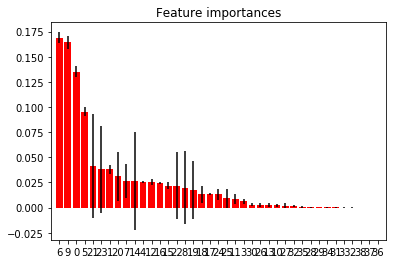

In [187]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt
forest =ExtraTreesClassifier()
forest.fit(X_train,target)

print(clf.feature_importances_ )

importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

train-maccuracy:0.94669	eval-maccuracy:0.933016
train-maccuracy:0.944466	eval-maccuracy:0.933028
train-maccuracy:0.946354	eval-maccuracy:0.934277
train-maccuracy:0.94012	eval-maccuracy:0.934438
train-maccuracy:0.946963	eval-maccuracy:0.934294
accuracy on train and validation is 0.9867358634742741,0.9311708407358588
accuracy on train and validation is 0.9379807692307692,0.9341796091466562
accuracy on train and validation is 0.93962366276108,0.9342942288956387
accuracy on train and validation is 0.9481278655119715,0.9345521233308499
accuracy on train and validation is 0.9636462047885889,0.9338930597741991
accuracy on train and validation is 0.9529323739174732,0.9344088486446215 #removing all
accuracy on train and validation is 0.9586920529801325,0.9356696658834317 #removing one
accuracy on train and validation is 0.9587939378502293,0.9334918906527595 #without removing one
accuracy on train and validation is 0.9530788334182374,0.9348100177660611#without top 2
accuracy on train and validation is 0.9392543301069791,0.9327468622843716 #without top 1 and 61 depth,0.01
accuracy on train and validation is 0.9536837748344371,0.9333772709037768#without top 1 and 61 depth, 0.02
accuracy on train and validation is 0.9375413907284769,0.932431657974669--0.04,depth 10
accuracy on train and validation is 0.9383628374936321,0.932804172158863--0.05,depth 10
accuracy on train and validation is 0.9397510188487009,0.9329187919078458--0.05,depth 11

0.73
accuracy on train and validation is 0.993054003404226,0.9927216459395954
accuracy on train and validation is 0.9451222618441162,0.9362714195655911 #removing 4
accuracy on train and validation is 0.9452336984207845,0.9340363344604276

accuracy on train and validation is 0.9510857106469689,0.9348386727033068

accuracy on train and validation is 0.9439760570555272,0.9353831165109748

In [20]:
pred = model.predict(dtest)

In [21]:
sub = pd.read_csv('sample_submissions_1.csv')
sub['target'] = pred
#sub['target'] = sub['target'].astype(int)
sub.to_csv('jishnu.csv', index=False)


In [20]:
from keras.utils import np_utils
out=np_utils.to_categorical(target,2)

Using TensorFlow backend.


In [37]:
from keras.models import Sequential
from keras.layers import Dense, Activation,Dropout
from keras.layers import Conv2D, MaxPooling2D,BatchNormalization
from keras.optimizers import SGD
import keras.backend as K
def auc_obj(y_true, y_pred):
    auc=roc_auc_score(y_true, y_pred)
    return k.auc
def mean_pred(y_true, y_pred):
    return K.mean(y_pred)

model = Sequential()
model.add(BatchNormalization(input_shape=(18,)))
model.add(Dense(3148, activation='relu', init='he_normal',input_dim=18))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Dense(28, activation='relu'))
model.add(BatchNormalization())
#model.add(Dropout(0.1))
model.add(Dense(22, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(12, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(3148, activation="relu", kernel_initializer="he_normal", input_dim=18)`
  


In [38]:
model.fit(X_tr1,y_tr1,  validation_split=0.1, shuffle=True, epochs=10, batch_size=64)

Train on 282672 samples, validate on 31408 samples
Epoch 1/10
282672/282672 [==============================] - 118s 418us/step - loss: 0.3035 - acc: 0.9070 - val_loss: 0.2839 - val_acc: 0.9141
Epoch 2/10
282672/282672 [==============================] - 115s 406us/step - loss: 0.2875 - acc: 0.9131 - val_loss: 0.2834 - val_acc: 0.9148
Epoch 3/10
282672/282672 [==============================] - 106s 376us/step - loss: 0.2861 - acc: 0.9135 - val_loss: 0.2825 - val_acc: 0.9146
Epoch 4/10
282672/282672 [==============================] - 106s 375us/step - loss: 0.2851 - acc: 0.9137 - val_loss: 0.2826 - val_acc: 0.9149
Epoch 5/10
282672/282672 [==============================] - 107s 380us/step - loss: 0.2844 - acc: 0.9139 - val_loss: 0.2812 - val_acc: 0.9151
Epoch 6/10
282672/282672 [==============================] - 105s 371us/step - loss: 0.2839 - acc: 0.9141 - val_loss: 0.2804 - val_acc: 0.9153
Epoch 7/10
282672/282672 [==============================] - 104s 367us/step - loss: 0.2835 - acc:

In [39]:
dnn_pred=stregr.predict(X_tr1)
dnn_pred1=stregr.predict(X_te1)
# Evaluate and visualize the fit
#r2=r2_score(y_tr1,pred)
r2=roc_auc_score(y_tr1,dnn_pred)
r2_1=roc_auc_score(y_te1,dnn_pred1)
print('training complete')
print("r2 score train and evaluation is {},{}".format(r2,r2_1))#

training complete
r2 score train and evaluation is 0.8994023047871758,0.691094336293827


In [26]:
#pred = model.predict(X_test)
pred = model.predict_proba(X_test)

NameError: name 'model' is not defined

In [27]:
xgb_pred=pd.read_csv('krishna.csv')

In [43]:
pred=xgb_pred['target'] *0.9 + lgb_pred*0.1

In [44]:
sub = pd.read_csv('sample_submissions_1.csv')
sub['target'] = pred
#sub['target'] = sub['target'].astype(int)
sub.to_csv('kesava.csv', index=False)
